# MILESTONE 2

## Perkenalan


`Name : Rizqi Rizmayani Putri`

`Batch : HCK-002`

## Problem Statement

`Analisis sentimen berdasarkan dataset film dari IMDB`

sumber data : https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews?datasetId=134715&sortBy=voteCount&searchQuery=nlp

## Problem Explanation

Akan dibuatnya website baru oleh sebuah perusahaan penyedia jasa streaming film. Tim data analis diminta untuk melakukan analisis sentimen, hal tersebut bertujuan untuk membantu sistem pada web baru tersebut untuk menampilkan dan menawarkan film-film berdasarkan data review dari penonton yang sudah menonton. Untuk menjawab problem tersebut, tim data analis menggunakan Natural Language Processing untuk membangun model dasar dalam memprediksi sentimen penonton. Adapun target urgensi dalam penelitian ini adalah positive review.






### IMPORT LIBRARY

In [159]:
# Import Library yang digunakan dalam penelitian ini

import pandas as pd
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
from sklearn.metrics import roc_curve,roc_auc_score,precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization, Embedding
from tensorflow.keras.layers import Dense, GlobalAveragePooling1D, Input, LSTM, GRU
from tensorflow.keras.models import Model, Sequential
import string
import re
from wordcloud import WordCloud
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

import pickle
import warnings
warnings.filterwarnings("ignore")

np.random.seed(42)
tf.random.set_seed(42)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [86]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [87]:
!cp /content/kaggle.json ~/.kaggle

In [88]:
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [89]:
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

imdb-dataset-of-50k-movie-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)


In [90]:
!unzip -q /content/imdb-dataset-of-50k-movie-reviews.zip -d dataset

replace dataset/IMDB Dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

Menggunakan API untuk akuisisi data dari website kaggle

### Loading and Overview Data

In [91]:
df = pd.read_csv('/content/dataset/IMDB Dataset.csv')

In [92]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [94]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


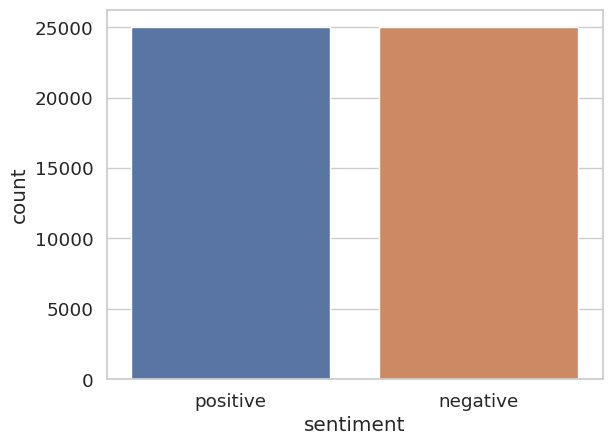

In [95]:
# Visualisasi data Sentimen

sns.set(style = "whitegrid" , font_scale = 1.2)
sns.countplot(df.sentiment)

In [96]:
# Melihat jumlah missing value

df.isna().sum()

review       0
sentiment    0
dtype: int64

Informasi sementara yang dapat diambil adalah:
- Data berjumlah 50000 baris dengan kategori sentimen sebanyak 2 kategori yaitu kategori positif dan negatif. data sentimen pada penelitian ini merupakan feature target
- Data pada kedua kategori sentimen berjumlah sama atau data balance
- Tidak terdapatnya missing value

### Exploratory Data Analysis (EDA)

In [97]:
# Melihat beberapa text untuk mengenali data

print(df.review[8])

Encouraged by the positive comments about this film on here I was looking forward to watching this film. Bad mistake. I've seen 950+ films and this is truly one of the worst of them - it's awful in almost every way: editing, pacing, storyline, 'acting,' soundtrack (the film's only song - a lame country tune - is played no less than four times). The film looks cheap and nasty and is boring in the extreme. Rarely have I been so happy to see the end credits of a film. <br /><br />The only thing that prevents me giving this a 1-score is Harvey Keitel - while this is far from his best performance he at least seems to be making a bit of an effort. One for Keitel obsessives only.


In [98]:
print(df.review[358])

This movie features Charlie Spradling dancing in a strip club. Beyond that, it features a truly bad script with dull, unrealistic dialogue. That it got as many positive votes suggests some people may be joking.


In [99]:
print(df.review[4589])

Horrible acting, horrible cast and cheap props. Would've been a lot better if was set as an action parody style movie. What a waste. Starting from the name of the movie.<br /><br />"The Enemy" Naming it "Action Movie" would've made it better. (contributing to the parody effect). The cop looking like a 60 Year old player, the blond girl just having the same blank boring look on her face at all times. Towards the end of the movie him and her are working together to take down the bad guys and every time they exchange words it just feels like the cheap lines given before a sex scene in a porn movie. Horrible. Don't waste your time.


In [100]:
print(df.review[12506])

Four or five episodes of Johnnie Socko and his Flying Robot edited together. Amusing giant robot battling giant monsters tale aimed squarely at kids. Parents of course will go crazy since the action is violent with the robot/monster battles resembling professional wrestling and the human on human violence the sort of stuff you'd find in the Al Capone St. Valentine's Day School and Gangster Training Academy. I liked it, but then again I grew up on the series. If there is any problems, other than the "men in suits" effects variety is that the movie plays like a series of episodes stitched together, with a climax coming every 20 minutes. Recommended for those who've run out of Ultraman or Godzilla


In [101]:
print(df.review[4850])

i am a big fan of karishma Kapoor and Govinda. I watched this film after i had seen Fiza, which was absolutley brilliant.<br /><br />There are films that are bad, and there are films that are cr*p. but this film just takes the biscuit.<br /><br />We were so annoyed that we were conned out of paying our money expecting a decent film.<br /><br />avoid at all cost, dont even rent it.<br /><br />1/10


Informasi yang didapatkan berdasarkan eksplorasi sederhana terhadap 5 review:
- penghapusan kata film, movie dan br. Hal tersebut dikarenakan kata-kata tersebut berada hampir pada semua review dan diindikasikan tidak memiliki pengaruh terhadap target
- penghapusan pada angka yang tertulis (one, two, tree dll)
- terdapatnya kata sambung, yang mana selanjutnya akan diterapkan wordstop untuk menghilangkannya
- terdapatnya tanda baca

In [102]:
# Merubah target kedalam bentuk binari

df.sentiment.replace("positive" , 1 , inplace = True)
df.sentiment.replace("negative" , 0 , inplace = True)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


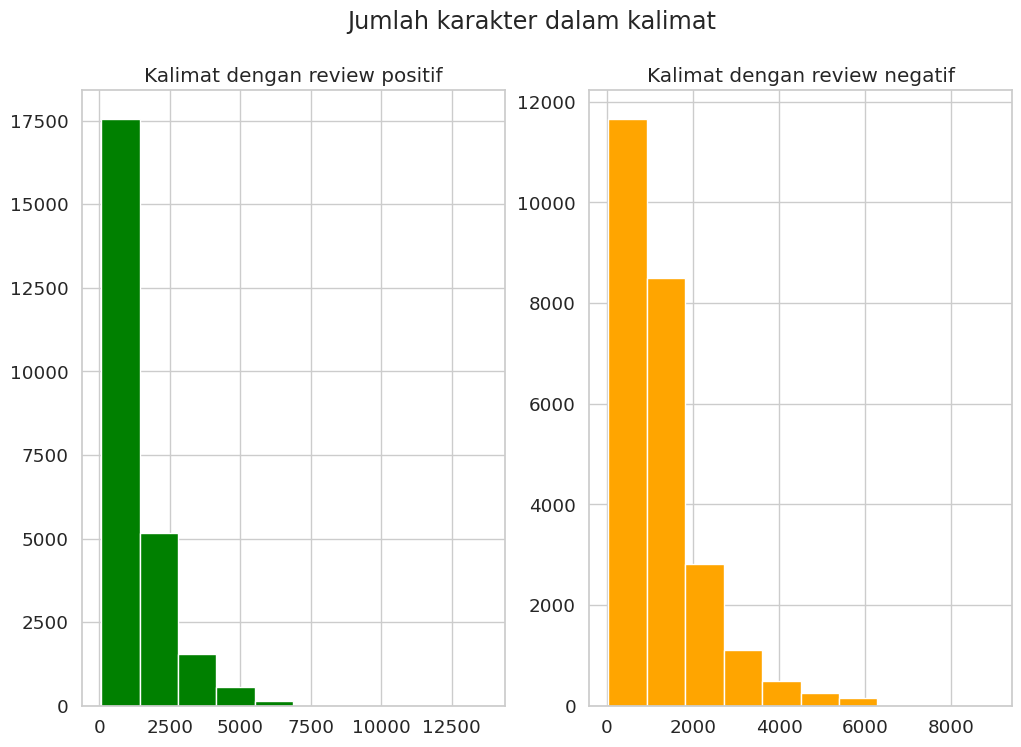

In [103]:
# Menampilkan jumlah karakter dalam diagram batang

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=df[df['sentiment']==1]['review'].str.len()
ax1.hist(text_len,color='green')
ax1.set_title('Kalimat dengan review positif')
text_len=df[df['sentiment']==0]['review'].str.len()
ax2.hist(text_len,color='orange')
ax2.set_title('Kalimat dengan review negatif')
fig.suptitle('Jumlah karakter dalam kalimat')
plt.show()

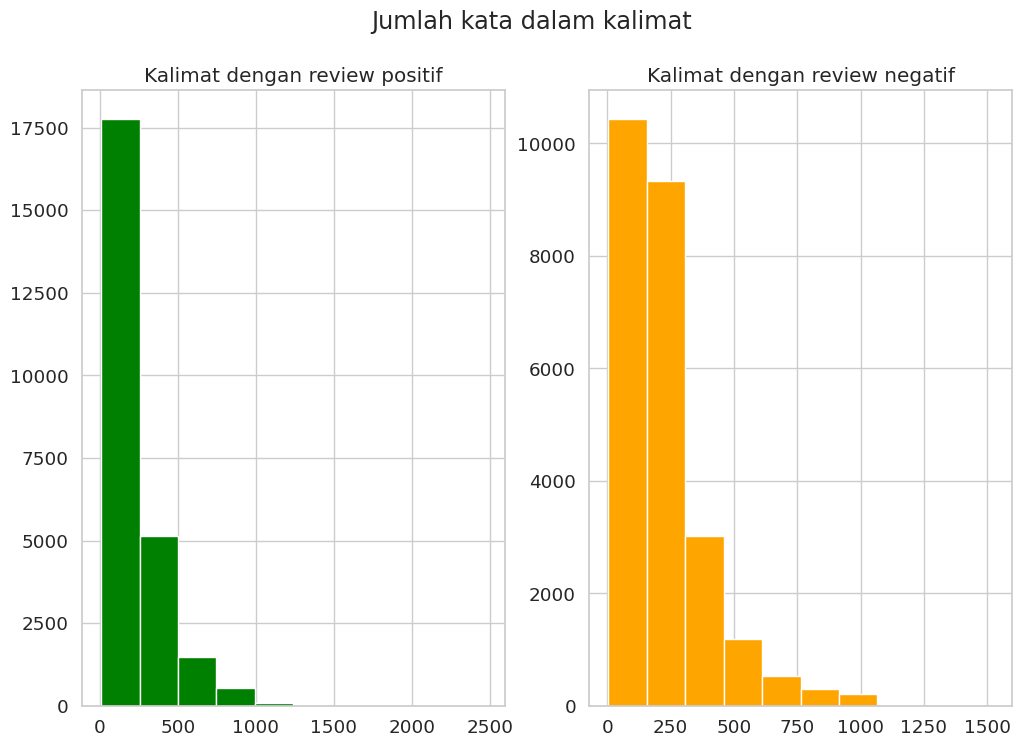

In [104]:
# Menampilkan jumlah kata dalam diagram batang

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=df[df['sentiment']==1]['review'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='green')
ax1.set_title('Kalimat dengan review positif')
text_len=df[df['sentiment']==0]['review'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='orange')
ax2.set_title('Kalimat dengan review negatif')
fig.suptitle('Jumlah kata dalam kalimat')
plt.show()

In [105]:
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [106]:
most_common_uni = get_top_text_ngrams(df.review,20,1)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Kata" , 'Jumlah'])
temp["Kata"] = list(most_common_uni.keys())
temp["Jumlah"] = list(most_common_uni.values())
fig = px.bar(temp, x="Jumlah", y="Kata", title='Kata yang sering muncul', orientation='h', 
             width=700, height=700,color='Kata')
fig.show()

Informasi yang didapatkan dari visualisasi data:
- Jumlah karakter pada review negatif lebih sedikit dibandingkan review positif. Review negatih lebih banyak menggunakan karakter lebih sedikit. Hal tersebut dapat dimaklumi dikarenakan kekecewaan penonton sehingga dalam penulisan review cenderung singkat. Berbanding terbalik dengan jumlah karakter pada review positif. Dikarenakan perasaan senang ataupun kagum setelah menonton, review yang ditulis cenderung lebih panjang.
- Sama halnya yang terjadi pada jumlah kata pada tiap kalimat. Kata pada kalimat review positif lebih banyak dibandingkan kata pada review negatif.
- Kata yang sering muncul didominasi oleh kata sambung, hal tersebut dikarenakan belum diterapkannya penghapusan stopword

In [107]:
# Persiapan data wordcloud

# slicing
good_review = df[df.sentiment==1]['review']
bad_review = df[df.sentiment==0]['review'].sample(100, random_state=0)

# merge dalam satu bracket list
join_sui_prep = '. '.join(list(good_review.values))
join_not_prep = '. '.join(list(bad_review.values))


# menyiapkan file .txt untuk TextRank Similarity
# label 1
with open('join_sui_prep.txt', 'w') as f:
    f.write(join_sui_prep)
# label 0
with open('join_not_prep.txt', 'w') as f:
    f.write(join_not_prep)

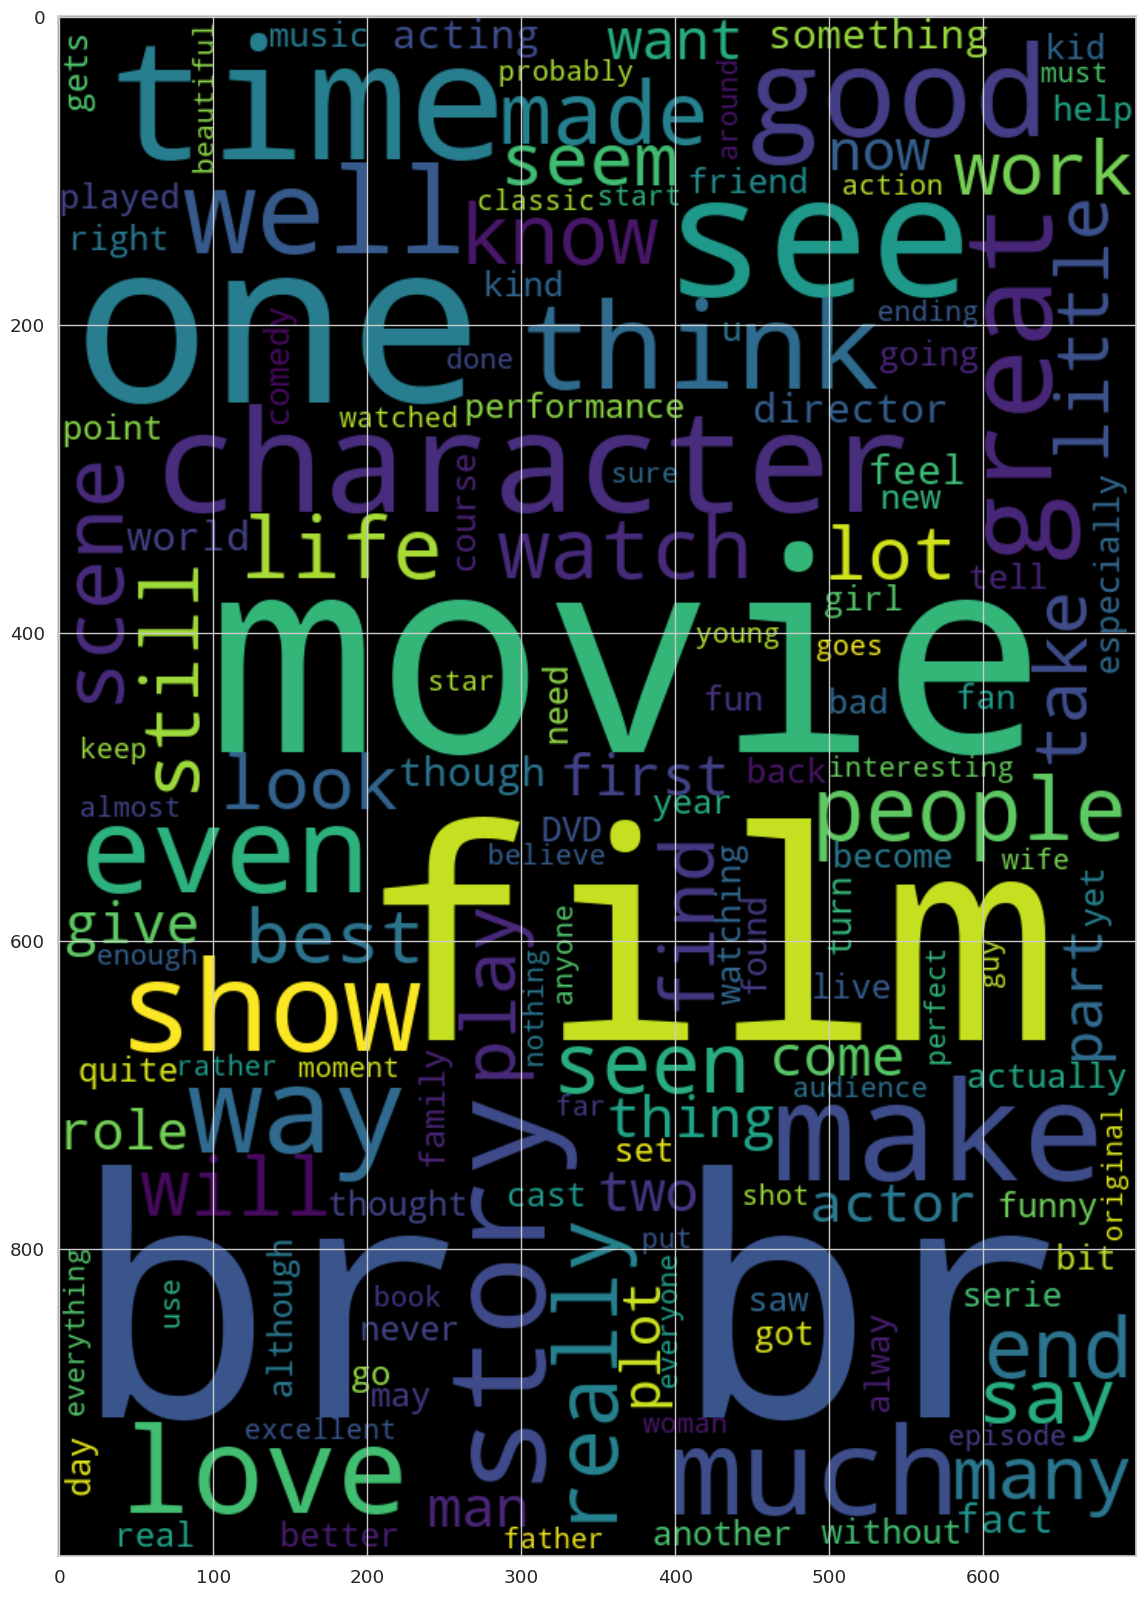

In [108]:
# wordcloud sentimen positif
plt.figure(figsize = (20,20)) 

w_cloud = WordCloud(background_color='black', min_font_size = 3,
                    max_words = 150 , width = 700 ,
                    height = 1000).generate(" ".join(good_review))

plt.imshow(w_cloud,interpolation = 'bilinear')

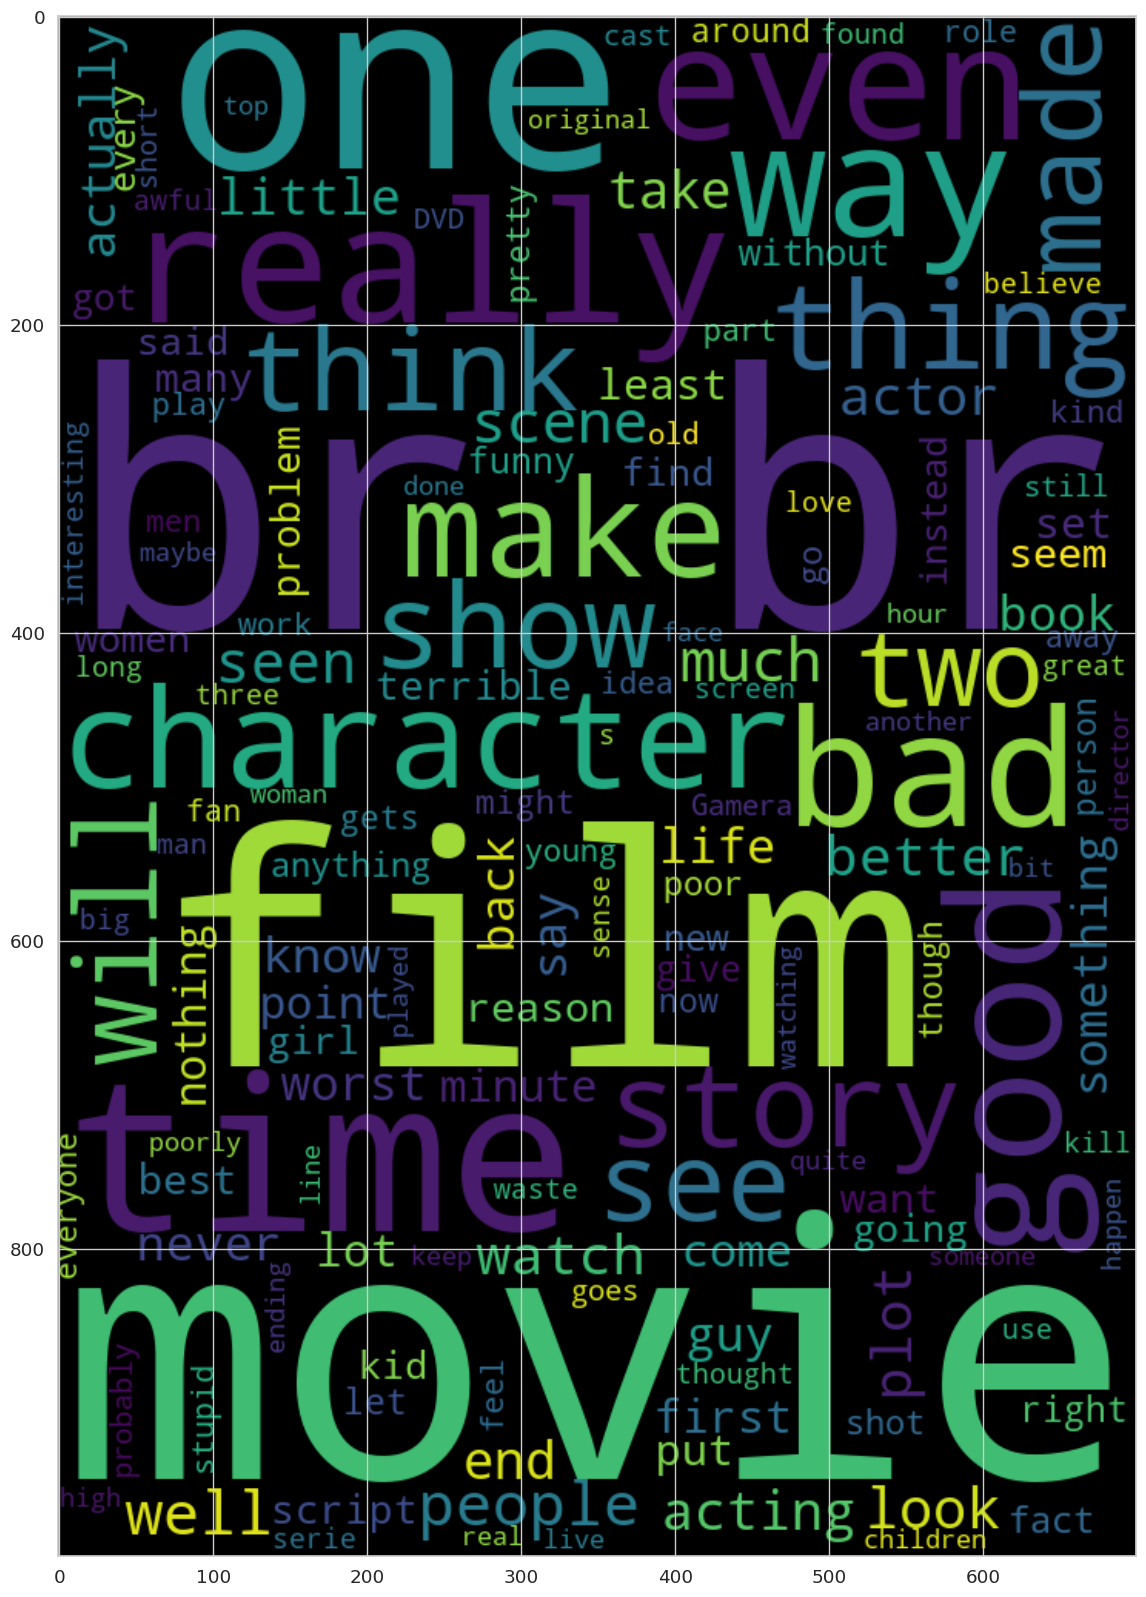

In [109]:
# wordcloud sentimen negatif
plt.figure(figsize = (20,20)) 

w_cloud = WordCloud(background_color='black', min_font_size = 3,
                    max_words = 150 , width = 700 ,
                    height = 1000).generate(" ".join(bad_review))

plt.imshow(w_cloud,interpolation = 'bilinear')

Informasi yang didapatkan dari wordcloud:
- terdapat beberapa kata dominan atau kata sering disebutkan yang sama pada kedua kategori seperti: good, well dll
- terdapat beberapa kata dominan yang tidak mempunyai informasi untuk memisahkan kedua kategori seperti: film, movie, one, br dll
-  kata-kata tersebut akan dihapus dengan cara membuat kata tambahan pada stopword

### DATA PREPROCESSING

#### a. Satu data

Dengan tujuan untuk menguji coba dan menentukan perlakuan apa saja yang nantinya akan diterapkan kepada semua data

In [110]:
# Menampilkan satu data

print(df.review[8])

Encouraged by the positive comments about this film on here I was looking forward to watching this film. Bad mistake. I've seen 950+ films and this is truly one of the worst of them - it's awful in almost every way: editing, pacing, storyline, 'acting,' soundtrack (the film's only song - a lame country tune - is played no less than four times). The film looks cheap and nasty and is boring in the extreme. Rarely have I been so happy to see the end credits of a film. <br /><br />The only thing that prevents me giving this a 1-score is Harvey Keitel - while this is far from his best performance he at least seems to be making a bit of an effort. One for Keitel obsessives only.


In [111]:
# Merubah teks ke lowercase

teks = df.review[8]
teks_lower = teks.lower()
teks_lower

"encouraged by the positive comments about this film on here i was looking forward to watching this film. bad mistake. i've seen 950+ films and this is truly one of the worst of them - it's awful in almost every way: editing, pacing, storyline, 'acting,' soundtrack (the film's only song - a lame country tune - is played no less than four times). the film looks cheap and nasty and is boring in the extreme. rarely have i been so happy to see the end credits of a film. <br /><br />the only thing that prevents me giving this a 1-score is harvey keitel - while this is far from his best performance he at least seems to be making a bit of an effort. one for keitel obsessives only."

In [112]:
# Menghilangkan tanda baca

teks_punc = teks_lower.translate(str.maketrans("","",string.punctuation))
teks_punc

'encouraged by the positive comments about this film on here i was looking forward to watching this film bad mistake ive seen 950 films and this is truly one of the worst of them  its awful in almost every way editing pacing storyline acting soundtrack the films only song  a lame country tune  is played no less than four times the film looks cheap and nasty and is boring in the extreme rarely have i been so happy to see the end credits of a film br br the only thing that prevents me giving this a 1score is harvey keitel  while this is far from his best performance he at least seems to be making a bit of an effort one for keitel obsessives only'

In [113]:
# Pengecekan tanda baca yang dihapus

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [114]:
# Preprocessing Lainnya

teks_punc = teks_punc.strip() #Menghilangkan whitespace
teks_punc = re.sub("[^A-Za-z\s']"," ", teks_punc) #Menghilangkan yang bukan huruf
teks_punc = re.sub("br"," ",teks_punc) #Menghilangkan br
teks_punc = re.sub("film"," ",teks_punc) #Menghilangkan film
teks_punc = re.sub("movie"," ",teks_punc) #Menghilangkan movie
teks_punc = ' '.join(teks_punc.split())
teks_punc = re.sub(r"can\'t", "can not", teks_punc)
teks_punc = re.sub(r"n\'t", " not", teks_punc)
teks_punc = re.sub(r"\'re", " are", teks_punc)
teks_punc = re.sub(r"\'s", " is", teks_punc)
teks_punc = re.sub(r"\'d", " would", teks_punc)
teks_punc = re.sub(r"\'ll", " will", teks_punc)
teks_punc = re.sub(r"\'t", " not", teks_punc)
teks_punc = re.sub(r"\'ve", " have", teks_punc)
teks_punc = re.sub(r"\'m", " am", teks_punc)
teks_punc

'encouraged by the positive comments about this on here i was looking forward to watching this bad mistake ive seen s and this is truly one of the worst of them its awful in almost every way editing pacing storyline acting soundtrack the s only song a lame country tune is played no less than four times the looks cheap and nasty and is boring in the extreme rarely have i been so happy to see the end credits of a the only thing that prevents me giving this a score is harvey keitel while this is far from his best performance he at least seems to be making a bit of an effort one for keitel obsessives only'

In [115]:
# Menghilangkan Stopwords dengan beberapa kata tambahan

stop_words_en = list(set(stopwords.words('english')))
new_stop_words = ['film', 'movie', 'br','one', 'time', 'character','good', 'even', 'will', 'show', 'story', 'well', 'see']

## Merge Stopwords
stop_words_en = stop_words_en + new_stop_words
stop_words_en = list(set(stop_words_en))


tokens = word_tokenize(teks_punc)
teks_stopwords = ' '.join([word for word in tokens if word not in stop_words_en])

print('Document     : ', teks_punc)
print('Tokens       : ', tokens)
print('Clean Tokens : ', teks_stopwords)

Document     :  encouraged by the positive comments about this on here i was looking forward to watching this bad mistake ive seen s and this is truly one of the worst of them its awful in almost every way editing pacing storyline acting soundtrack the s only song a lame country tune is played no less than four times the looks cheap and nasty and is boring in the extreme rarely have i been so happy to see the end credits of a the only thing that prevents me giving this a score is harvey keitel while this is far from his best performance he at least seems to be making a bit of an effort one for keitel obsessives only
Tokens       :  ['encouraged', 'by', 'the', 'positive', 'comments', 'about', 'this', 'on', 'here', 'i', 'was', 'looking', 'forward', 'to', 'watching', 'this', 'bad', 'mistake', 'ive', 'seen', 's', 'and', 'this', 'is', 'truly', 'one', 'of', 'the', 'worst', 'of', 'them', 'its', 'awful', 'in', 'almost', 'every', 'way', 'editing', 'pacing', 'storyline', 'acting', 'soundtrack', 

In [116]:
# Menghilangkan kata imbuhan

stemmer = SnowballStemmer("english")

teks_stemm  = stemmer.stem(teks_stopwords)

print('Document       : ', teks_punc)
print('Tokens         : ', tokens)
print('Clean Tokens   : ', teks_stopwords)
print('Stemmed Tokens : ', teks_stemm)

Document       :  encouraged by the positive comments about this on here i was looking forward to watching this bad mistake ive seen s and this is truly one of the worst of them its awful in almost every way editing pacing storyline acting soundtrack the s only song a lame country tune is played no less than four times the looks cheap and nasty and is boring in the extreme rarely have i been so happy to see the end credits of a the only thing that prevents me giving this a score is harvey keitel while this is far from his best performance he at least seems to be making a bit of an effort one for keitel obsessives only
Tokens         :  ['encouraged', 'by', 'the', 'positive', 'comments', 'about', 'this', 'on', 'here', 'i', 'was', 'looking', 'forward', 'to', 'watching', 'this', 'bad', 'mistake', 'ive', 'seen', 's', 'and', 'this', 'is', 'truly', 'one', 'of', 'the', 'worst', 'of', 'them', 'its', 'awful', 'in', 'almost', 'every', 'way', 'editing', 'pacing', 'storyline', 'acting', 'soundtrac

#### b. Seluruh data

Menerapkan preprocess yang sudah ditentukan sebelumnya terhadap semua data, adapun langkah yang dilakukan untuk preprocessing adalah:
- mengubah teks kedalam lower case
- menghilangkan whitespace
- menghilangkan tanda baca
- mengubah beberapa kata yang gabung dengan imbuhannya seperti i'll, we're, he's dll
- tokenization
- stopword
- stemmer

In [117]:
# Membuat Sebuah Function Agar Dapat Diterapkan pada DataFrame

def txt_test(txt):
  txt = txt.lower()
  txt = txt.strip() #Menghilangkan whitespace
  txt = re.sub("[^A-Za-z\s']"," ", txt) #Menghilangkan yang bukan huruf
  txt = ' '.join(txt.split())
  txt = re.sub(r"can\'t", "can not", txt)
  txt = re.sub(r"n\'t", " not", txt)
  txt = re.sub(r"\'re", " are", txt)
  txt = re.sub(r"\'s", " is", txt)
  txt = re.sub(r"\'d", " would", txt)
  txt = re.sub(r"\'ll", " will", txt)
  txt = re.sub(r"\'t", " not", txt)
  txt = re.sub(r"\'ve", " have", txt)
  txt = re.sub(r"\'m", " am", txt)
  token = word_tokenize(txt)
  txt = ' '.join([word for word in token if word not in stop_words_en])
  txt = stemmer.stem(txt)
  return txt

In [118]:
# Mengaplikasikan semua teknik preprocessing ke dalam semua data

df['review_processed'] = df['review'].apply(lambda x: txt_test(x))
df

,review,sentiment,review_processed
0,One of the other reviewers has mentioned that ...,1,reviewers mentioned watching oz episode hooked...
1,A wonderful little production. <br /><br />The...,1,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,1,thought wonderful way spend hot summer weekend...
3,Basically there's a family where a little boy ...,0,basically family little boy jake thinks zombie...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter mattei love money visually stunning wat...
...,...,...,...
49995,I thought this movie did a down right good job...,1,thought right job creative original first expe...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0,bad plot bad dialogue bad acting idiotic direc...
49997,I am a Catholic taught in parochial elementary...,0,catholic taught parochial elementary schools n...
49998,I'm going to have to disagree with the previou...,0,going disagree previous comment side maltin se...


### Tokenization & Word Embedding

#### Embedding Layer in Deep Learning with Tensorflow

Split data untuk data train dan data test

In [119]:
# Spliting data

X_train, X_test, y_train, y_test = train_test_split(df.review_processed, 
                                                    df.sentiment, 
                                                    test_size=0.25, 
                                                    random_state=46, 
                                                    stratify=df.sentiment)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (37500,)
Test Size  :  (12500,)


In [120]:
# Get Vocabularies

Vectorize = CountVectorizer()
X_train_vec = Vectorize.fit_transform(X_train)
X_test_vec = Vectorize.transform(X_test)

X_train_vec

<37500x91366 sparse matrix of type '<class 'numpy.int64'>'
	with 3480131 stored elements in Compressed Sparse Row format>

In [121]:
# Mencari Jumlah Vocab dan Panjang Token dalam Satu DOcument

jml_vocab = len(Vectorize.vocabulary_.keys())
#max_sen_len = int(np.mean([len(i.split(" ")) for i in X_train]))
max_sen_len = 250

print("Jumlah vocab:",jml_vocab)
print("Panjang maksimum kalimat:",max_sen_len,"kata")

Jumlah vocab: 91366
Panjang maksimum kalimat: 250 kata


Menentukan panjang maksimum kalimat yang akan digunakan dalam model. Percobaan pertama menggunakan max jumlah kalimat sebanyak 1014 kata, performa model yang dihasilkan sangat buruk. selajutnya dicari nilai median dan mean yang mana nilai median 88 dan mean 118. penulis memilih untuk menggunakan jumlah kata sebanyak 250. Dengan peritimbangan nilai mean dan median. Dengan asumsi panjang kalimat tersebut masih mewakili populasi 

In [122]:
# Text Vectorization

text_vectorization = TextVectorization(max_tokens=jml_vocab,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode="int",
                                       output_sequence_length=max_sen_len,
                                       input_shape=(1,) # jika ingin menggunakan sequential API
                                       )

text_vectorization.adapt(X_train)

In [123]:
# Contoh Text Vectorization

## Contoh Document
print('Contoh Document')
print(df.review_processed[0])
print('')

## Hasil Text Vectorization
print('Hasil Text Vectorization')
print(text_vectorization([df.review_processed[0]]))
print('Ukuran vector : ', text_vectorization([df.review_processed[0]]).shape)

Contoh Document
reviewers mentioned watching oz episode hooked right exactly happened first thing struck oz brutality unflinching scenes violence set right word go trust faint hearted timid pulls punches regards drugs sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home many aryans muslims gangstas latinos christians italians irish scuffles death stares dodgy dealings shady agreements never far away would say main appeal due fact goes shows would dare forget pretty pictures painted mainstream audiences forget charm forget romance oz mess around first episode ever saw struck nasty surreal could say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards sold nickel inmates kill order get away mannered middle class inmates turned prison bitches due lack street sk

In [124]:
text_vectorization.get_vocabulary()[1952]

'cash'

In [125]:
# Melihat Top 20 Token (Diurutkan Berdasarkan Frekuensi Kemunculan Terbesar)

text_vectorization.get_vocabulary()[:20]

['',
 '[UNK]',
 'like',
 'would',
 'really',
 'much',
 'could',
 'get',
 'bad',
 'great',
 'people',
 'also',
 'first',
 'made',
 'way',
 'make',
 'movies',
 'think',
 'characters',
 'watch']

In [126]:
# Embedding

embedding = Embedding(input_dim=jml_vocab,
                      output_dim=32,
                      embeddings_initializer="uniform",
                      input_length=max_sen_len
                      )

In [127]:
# Contoh Hasil Embedding

## Contoh Document
print('Contoh Document')
print(df.review_processed[0])
print('')

## Hasil Text Vectorization
print('Hasil Text Vectorization')
print(text_vectorization([df.review_processed[0]]))
print('Ukuran vector : ', text_vectorization([df.review_processed[0]]).shape)
print('')

## Hasil Embedding
print('Hasil Embedding')
print(embedding(text_vectorization([df.review_processed[0]])))
print('Ukuran vector : ', embedding(text_vectorization([df.review_processed[0]])).shape)

Contoh Document
reviewers mentioned watching oz episode hooked right exactly happened first thing struck oz brutality unflinching scenes violence set right word go trust faint hearted timid pulls punches regards drugs sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home many aryans muslims gangstas latinos christians italians irish scuffles death stares dodgy dealings shady agreements never far away would say main appeal due fact goes shows would dare forget pretty pictures painted mainstream audiences forget charm forget romance oz mess around first episode ever saw struck nasty surreal could say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards sold nickel inmates kill order get away mannered middle class inmates turned prison bitches due lack street sk

### Modeling

Melakukan percobaan pada 3 model, yaitu:
- DNN
- LSTM
- GRU

---
### Deep Learning - Fully Connected Layer

#### DNN

In [128]:
# Model Training dengan menggunakan Dense Layer

model = Sequential()
model.add(text_vectorization)
model.add(embedding)
model.add(GlobalAveragePooling1D())
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')

model_dnn_hist = model.fit(X_train,
                         y_train,
                         epochs=25,batch_size=64,
                         validation_data=(X_test, y_test))

Epoch 1/25
586/586 [==============================] - 6s 9ms/step - loss: 0.4639 - accuracy: 0.8084 - val_loss: 0.2818 - val_accuracy: 0.8913
Epoch 2/25
586/586 [==============================] - 5s 8ms/step - loss: 0.2158 - accuracy: 0.9215 - val_loss: 0.2514 - val_accuracy: 0.9003
Epoch 3/25
586/586 [==============================] - 5s 8ms/step - loss: 0.1486 - accuracy: 0.9475 - val_loss: 0.2788 - val_accuracy: 0.8891
Epoch 4/25
586/586 [==============================] - 5s 8ms/step - loss: 0.1059 - accuracy: 0.9647 - val_loss: 0.2818 - val_accuracy: 0.8964
Epoch 5/25
586/586 [==============================] - 5s 8ms/step - loss: 0.0714 - accuracy: 0.9790 - val_loss: 0.3220 - val_accuracy: 0.8906
Epoch 6/25
586/586 [==============================] - 5s 8ms/step - loss: 0.0491 - accuracy: 0.9863 - val_loss: 0.3519 - val_accuracy: 0.8918
Epoch 7/25
586/586 [==============================] - 5s 8ms/step - loss: 0.0320 - accuracy: 0.9922 - val_loss: 0.4168 - val_accuracy: 0.8821
Epoch 

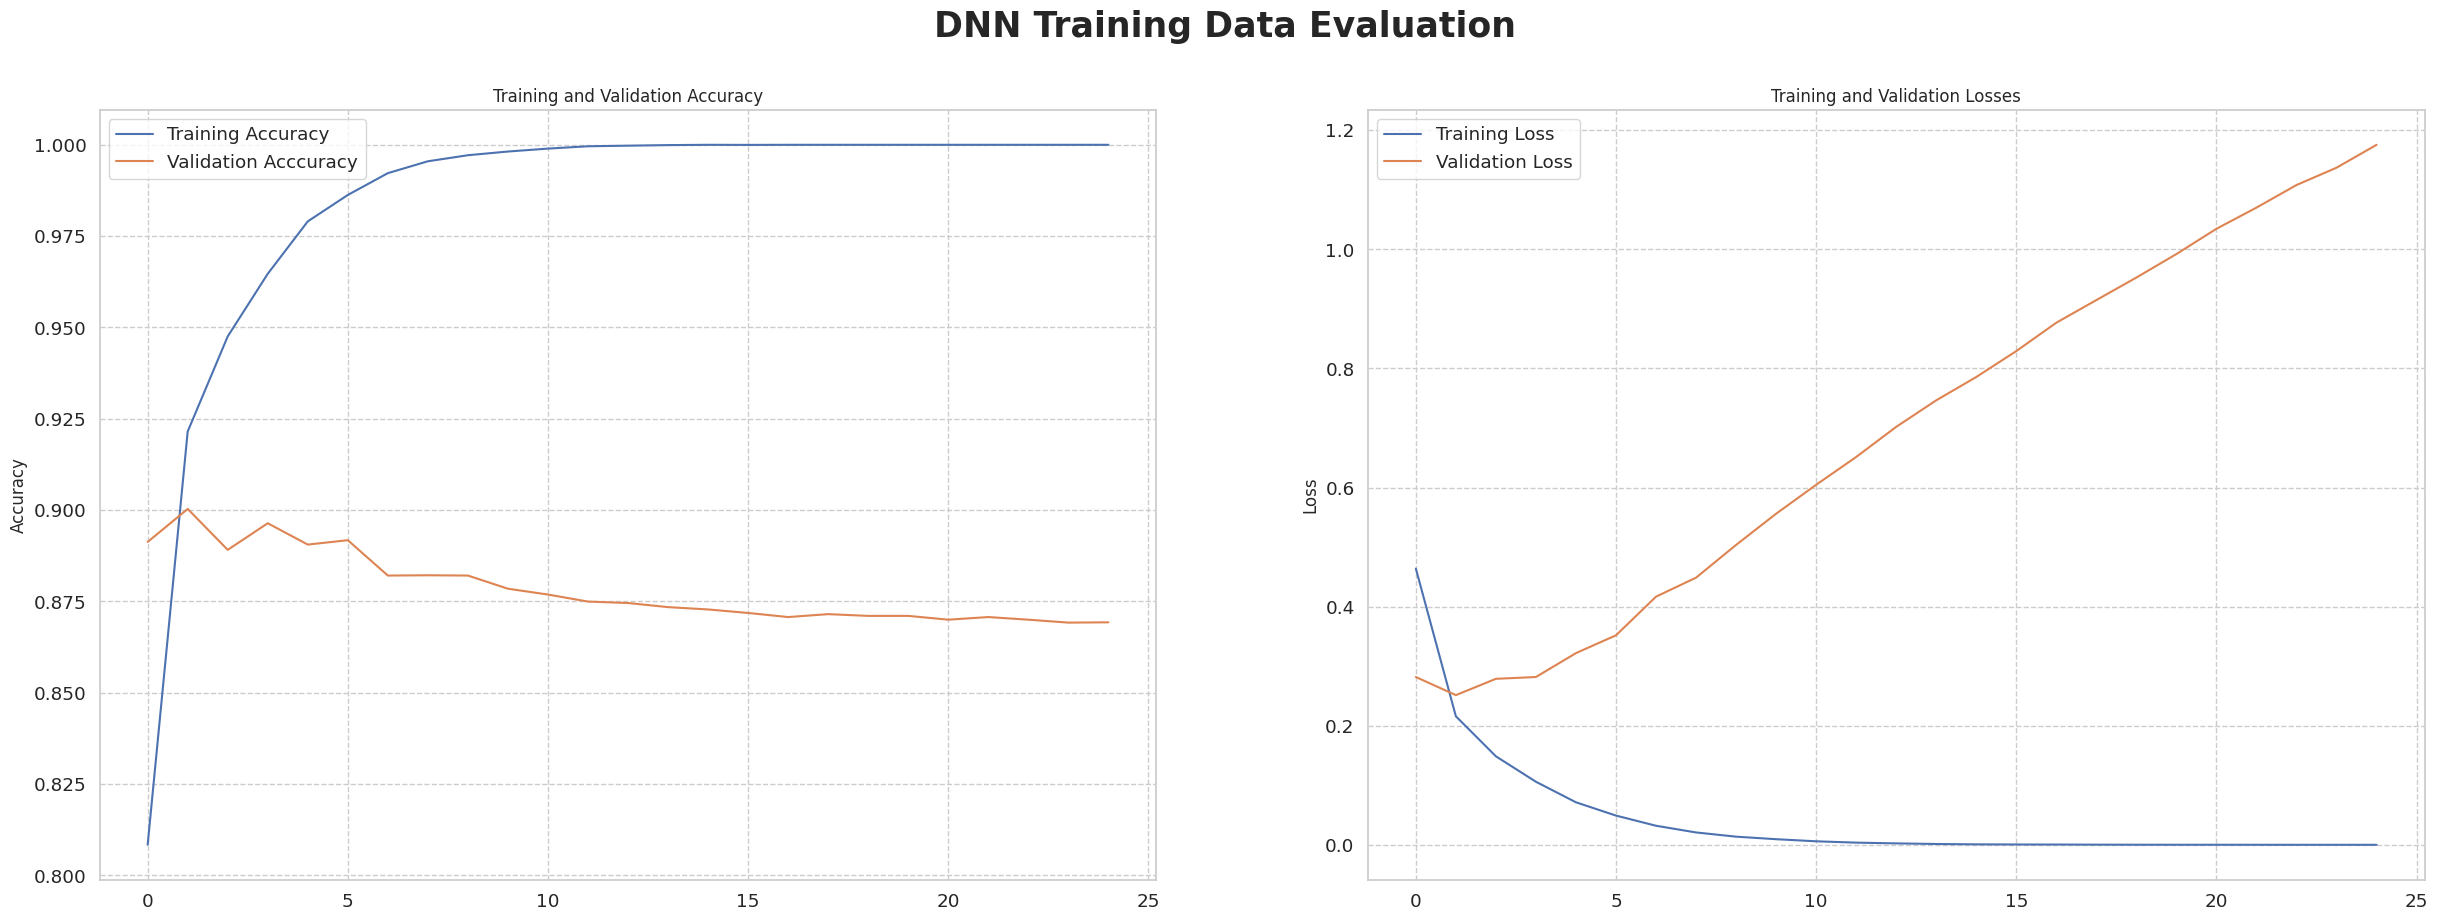

In [129]:
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('DNN Training Data Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(model_dnn_hist.history['accuracy'],label="Training Accuracy")
plt.plot(model_dnn_hist.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(model_dnn_hist.history['loss'], label="Training Loss")
plt.plot(model_dnn_hist.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

Model DNN:
- performa model overfit, hal tersebut dikarenakan terlalu kompleksnya data, sehingga membutuhkan model lain yang dapat mengurai komplektifitas tersebut
- sudah dilakukan percobaan pada tuning hyperparameter, namun tidak ada perubahan yang berarti

#### LSTM

In [153]:
# Model Training dengan Menggunakan LSTM

model1 = Sequential()
model1.add(text_vectorization)
model1.add(embedding)
model1.add(LSTM(32, return_sequences=True,kernel_initializer='HeNormal'))
#model.add(LSTM(32))
model1.add(LSTM(16))
model1.add(Dense(1,activation='sigmoid'))
optm = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model1.add(tf.keras.layers.BatchNormalization())
model1.compile(optm,loss='binary_crossentropy',metrics='accuracy')

model_lstm_hist = model1.fit(X_train,
                         y_train,
                         epochs=10,batch_size=64,
                         validation_data=(X_test, y_test))

Epoch 1/10
586/586 [==============================] - 22s 29ms/step - loss: 1.5135 - accuracy: 0.5002 - val_loss: 1.3681 - val_accuracy: 0.4910
Epoch 2/10
586/586 [==============================] - 16s 28ms/step - loss: 1.4463 - accuracy: 0.4989 - val_loss: 1.5149 - val_accuracy: 0.5001
Epoch 3/10
586/586 [==============================] - 16s 28ms/step - loss: 2.1616 - accuracy: 0.6656 - val_loss: 3.5959 - val_accuracy: 0.7605
Epoch 4/10
586/586 [==============================] - 16s 28ms/step - loss: 2.1829 - accuracy: 0.7877 - val_loss: 3.3781 - val_accuracy: 0.7496
Epoch 5/10
586/586 [==============================] - 17s 29ms/step - loss: 1.7169 - accuracy: 0.8745 - val_loss: 2.7773 - val_accuracy: 0.7948
Epoch 6/10
586/586 [==============================] - 16s 28ms/step - loss: 0.9675 - accuracy: 0.9220 - val_loss: 2.3866 - val_accuracy: 0.8310
Epoch 7/10
586/586 [==============================] - 16s 28ms/step - loss: 0.5053 - accuracy: 0.9430 - val_loss: 2.2443 - val_accuracy:

In [154]:
model1.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (TextV  (None, 250)              0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 250, 32)           2923712   
                                                                 
 lstm_38 (LSTM)              (None, 250, 32)           8320      
                                                                 
 lstm_39 (LSTM)              (None, 16)                3136      
                                                                 
 dense_24 (Dense)            (None, 1)                 17        
                                                                 
 batch_normalization_33 (Bat  (None, 1)                4         
 chNormalization)                                    

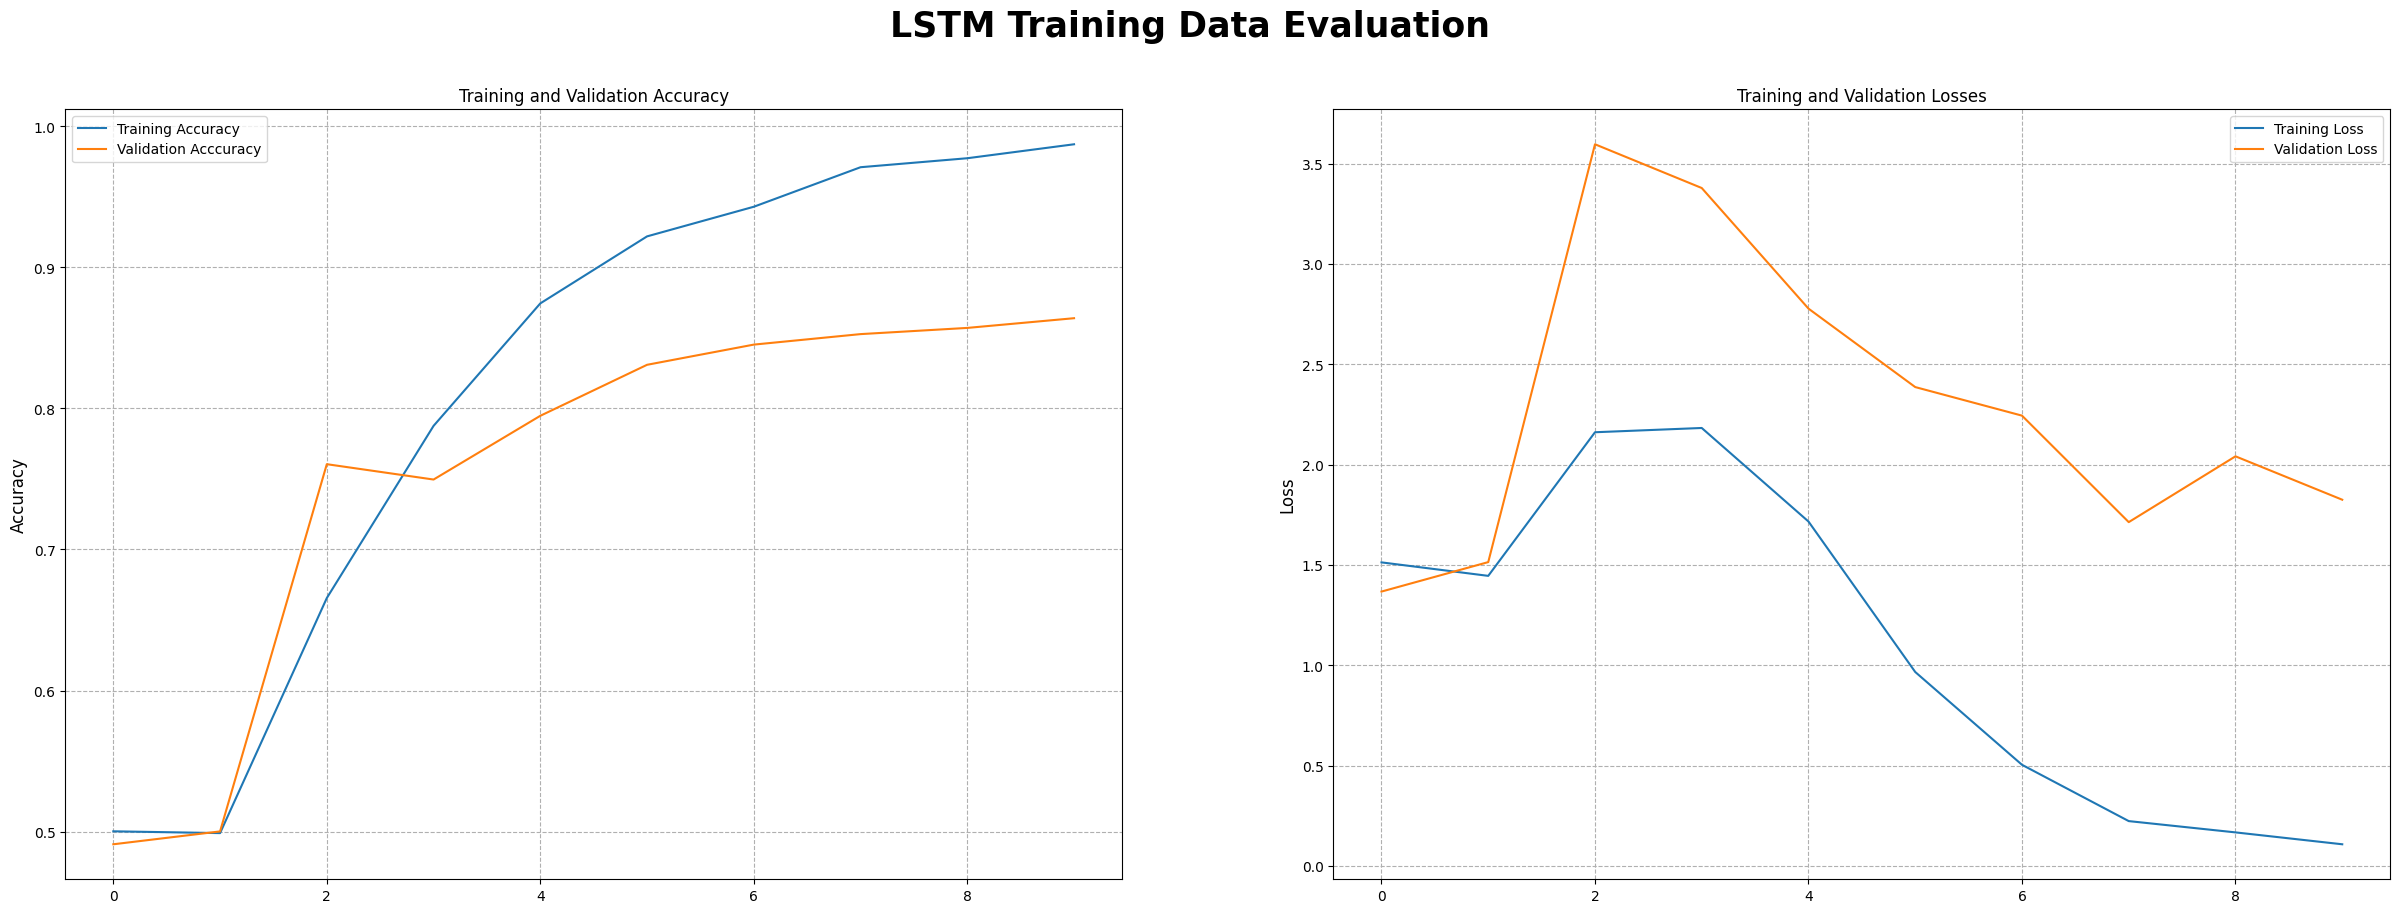

In [155]:
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('LSTM Training Data Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(model_lstm_hist.history['accuracy'],label="Training Accuracy")
plt.plot(model_lstm_hist.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(model_lstm_hist.history['loss'], label="Training Loss")
plt.plot(model_lstm_hist.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

Model LSTM:
- performa model overfit, namun tidak seburuk model DNN
- merupakan model terbaik dari ketiga model yang mana selanjutnya akan dilakukan tuning pada hyperparameternya

#### GRU

In [134]:
# Model Training dengan Menggunakan GRU

model = Sequential()
model.add(text_vectorization)
model.add(embedding)
model.add(GRU(32, return_sequences=True))
model.add(GRU(16))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='Adamax',metrics='accuracy')

model_gru_hist_1 = model.fit(X_train,
                         y_train,
                         epochs=10,batch_size=64,
                         validation_data=(X_test, y_test))

Epoch 1/10
586/586 [==============================] - 25s 35ms/step - loss: 0.4550 - accuracy: 0.7133 - val_loss: 0.5507 - val_accuracy: 0.8446
Epoch 2/10
586/586 [==============================] - 20s 34ms/step - loss: 0.0979 - accuracy: 0.9770 - val_loss: 0.6474 - val_accuracy: 0.8432
Epoch 3/10
586/586 [==============================] - 19s 32ms/step - loss: 0.0952 - accuracy: 0.9767 - val_loss: 0.6382 - val_accuracy: 0.8530
Epoch 4/10
586/586 [==============================] - 17s 28ms/step - loss: 0.0548 - accuracy: 0.9839 - val_loss: 0.6850 - val_accuracy: 0.8566
Epoch 5/10
586/586 [==============================] - 16s 28ms/step - loss: 0.0393 - accuracy: 0.9885 - val_loss: 0.7192 - val_accuracy: 0.8558
Epoch 6/10
586/586 [==============================] - 18s 31ms/step - loss: 0.0307 - accuracy: 0.9912 - val_loss: 0.7189 - val_accuracy: 0.8587
Epoch 7/10
586/586 [==============================] - 18s 31ms/step - loss: 0.0271 - accuracy: 0.9925 - val_loss: 0.7454 - val_accuracy:

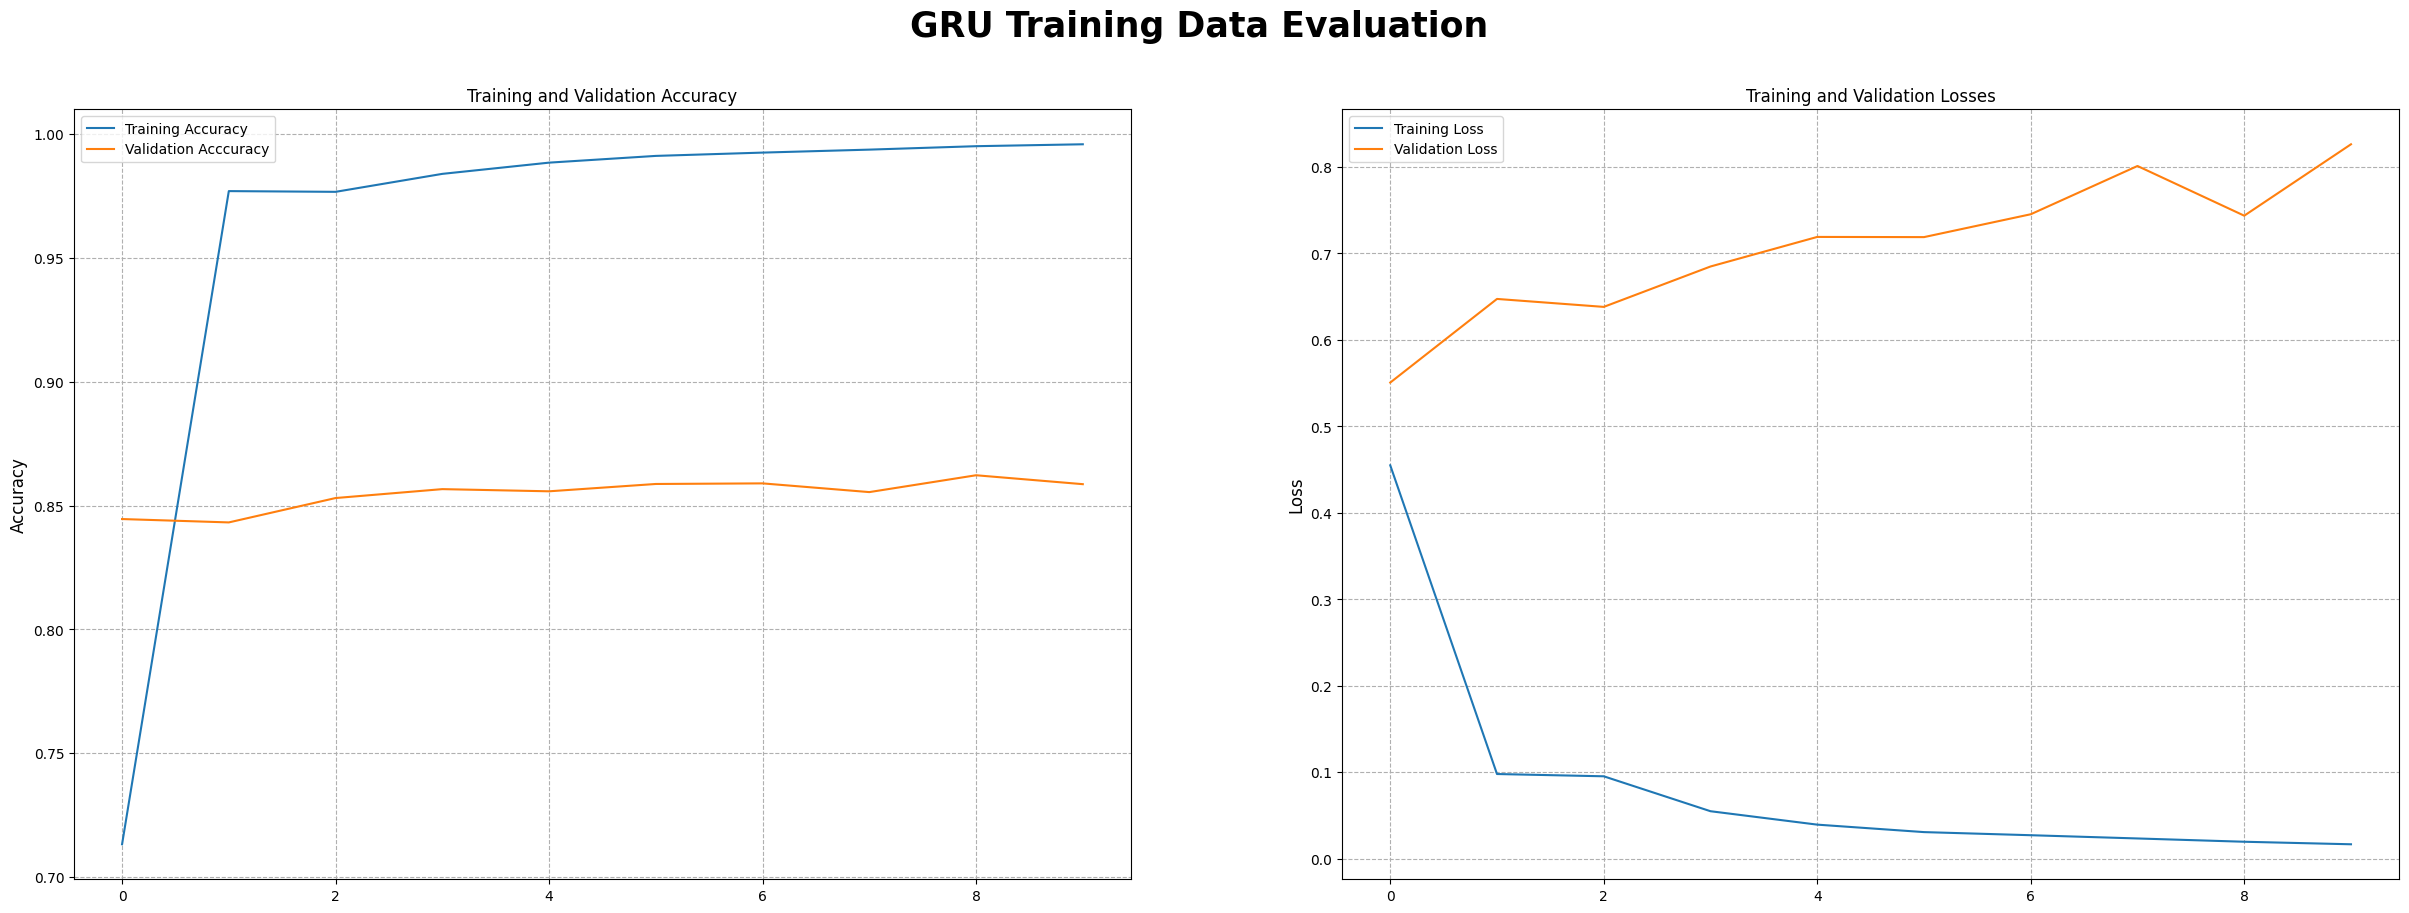

In [135]:
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('GRU Training Data Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(model_gru_hist_1.history['accuracy'],label="Training Accuracy")
plt.plot(model_gru_hist_1.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(model_gru_hist_1.history['loss'], label="Training Loss")
plt.plot(model_gru_hist_1.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

Model Gru:
- Performa model overfit, terbentuk fanish dan exploding pada accurasi dan nilai loss

### Model Improvement

#### Hyperparameter tuning model LSTM

In [149]:
# Model Training dengan Menggunakan LSTM

model = Sequential()
model.add(text_vectorization)
model.add(embedding)
model.add(LSTM(32, return_sequences=True, dropout=0.3))
model.add(tf.keras.layers.BatchNormalization())
model.add(LSTM(16,dropout=0.3))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(1,activation='sigmoid'))
optm = tf.keras.optimizers.RMSprop(learning_rate=0.0001,clipvalue=0.01)
model.compile(optm,loss='binary_focal_crossentropy',metrics='accuracy')

model_lstm_hist_1 = model.fit(X_train,
                         y_train,
                         epochs=40,batch_size=64,
                         validation_data=(X_test, y_test))

Epoch 1/40
586/586 [==============================] - 23s 32ms/step - loss: 0.2198 - accuracy: 0.5090 - val_loss: 0.1721 - val_accuracy: 0.5282
Epoch 2/40
586/586 [==============================] - 22s 37ms/step - loss: 0.1837 - accuracy: 0.5156 - val_loss: 0.1814 - val_accuracy: 0.5144
Epoch 3/40
586/586 [==============================] - 23s 39ms/step - loss: 0.1669 - accuracy: 0.5609 - val_loss: 0.2588 - val_accuracy: 0.8651
Epoch 4/40
586/586 [==============================] - 20s 33ms/step - loss: 0.0076 - accuracy: 0.9952 - val_loss: 0.2695 - val_accuracy: 0.8722
Epoch 5/40
586/586 [==============================] - 23s 39ms/step - loss: 0.0051 - accuracy: 0.9966 - val_loss: 0.3081 - val_accuracy: 0.8722
Epoch 6/40
586/586 [==============================] - 22s 37ms/step - loss: 0.0045 - accuracy: 0.9973 - val_loss: 0.3449 - val_accuracy: 0.8712
Epoch 7/40
586/586 [==============================] - 22s 37ms/step - loss: 0.0043 - accuracy: 0.9973 - val_loss: 0.3551 - val_accuracy:

In [150]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (TextV  (None, 250)              0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 250, 32)           2923712   
                                                                 
 lstm_36 (LSTM)              (None, 250, 32)           8320      
                                                                 
 batch_normalization_31 (Bat  (None, 250, 32)          128       
 chNormalization)                                                
                                                                 
 lstm_37 (LSTM)              (None, 16)                3136      
                                                                 
 batch_normalization_32 (Bat  (None, 16)             

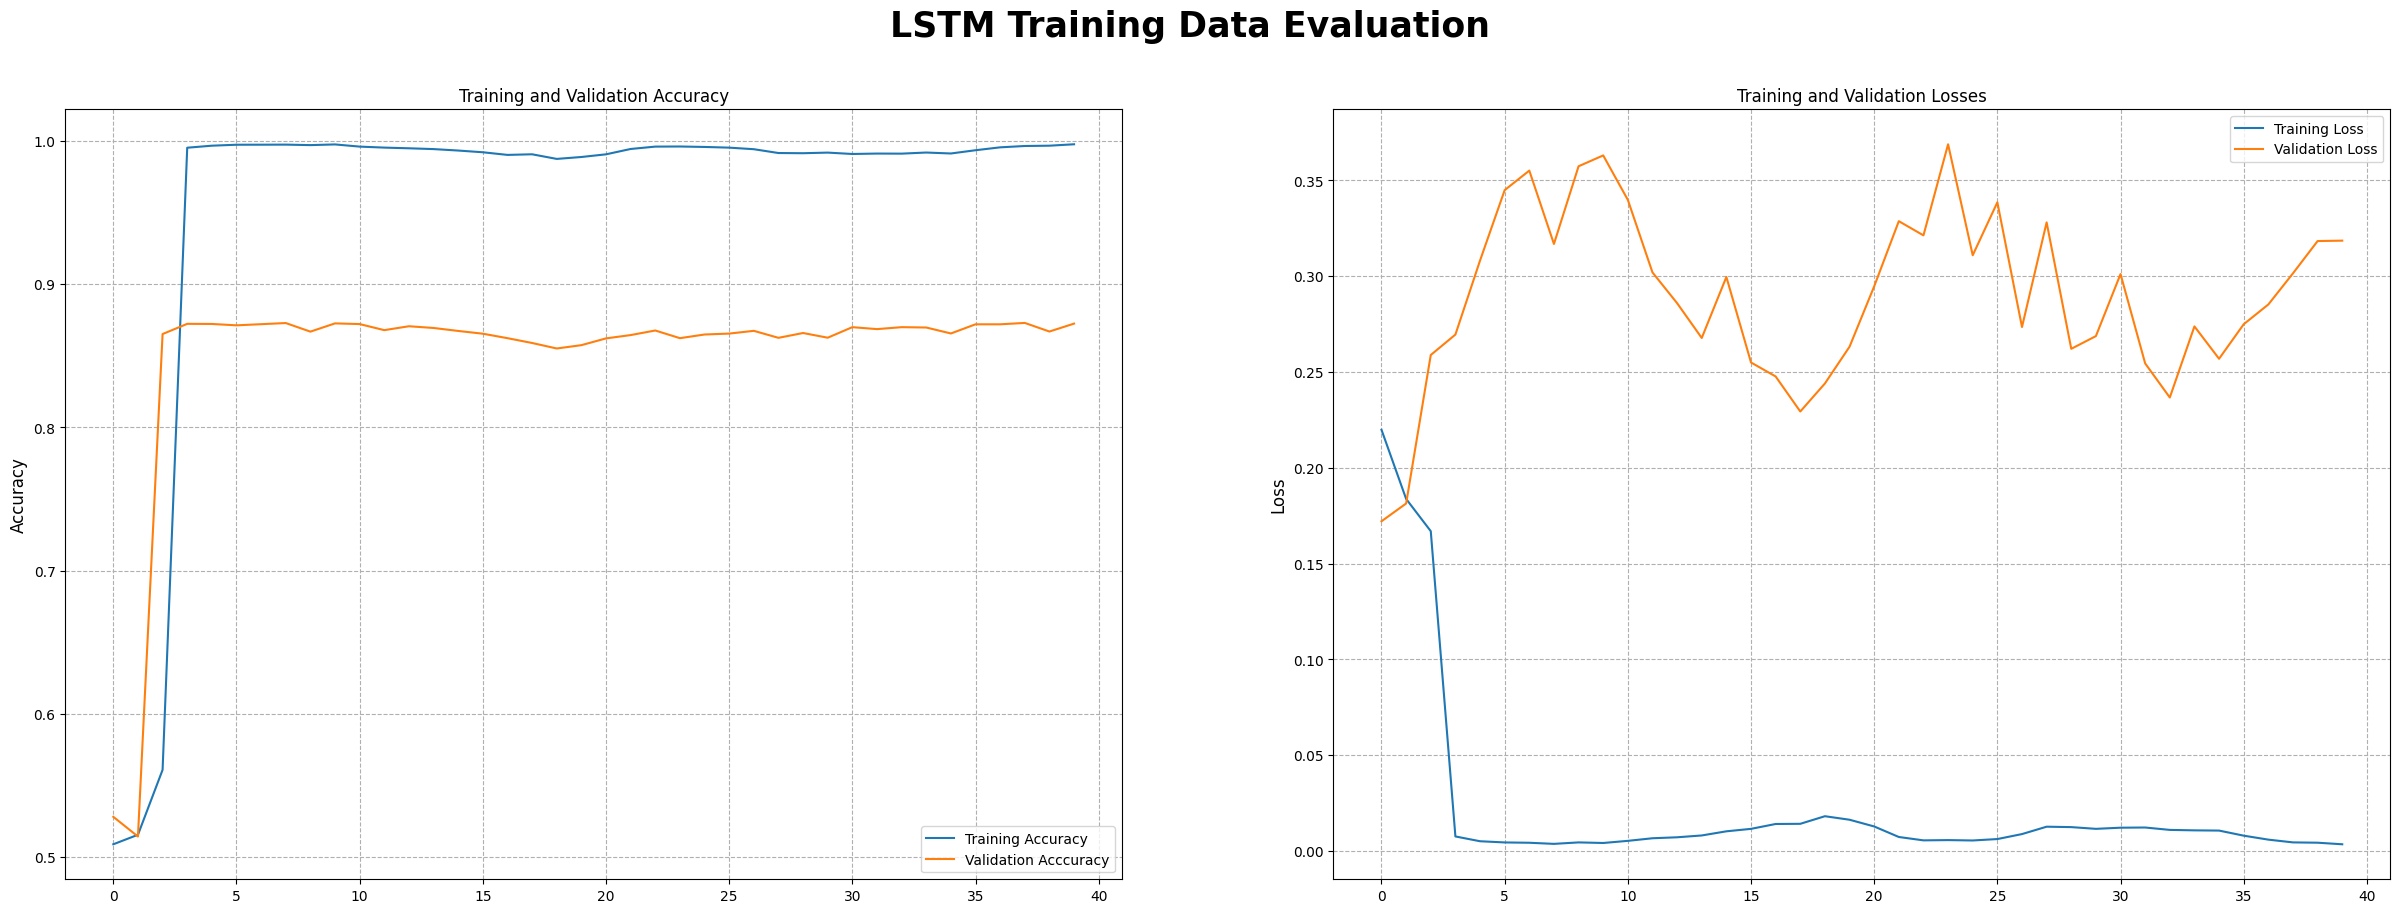

In [151]:
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('LSTM Training Data Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(model_lstm_hist_1.history['accuracy'],label="Training Accuracy")
plt.plot(model_lstm_hist_1.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(model_lstm_hist_1.history['loss'], label="Training Loss")
plt.plot(model_lstm_hist_1.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

Hyperparameter Tuning:
- tujuan awal dari tuning parameter adalah untuk memperbaiki model LSTM yang mana sebelumnya performa model overfit
- tuning yang dilakukan:

a. percobaan pada optimizer adam, adagrad, adamax dan RMSprop, optimizer yang menunjukan performa lebih baik adalah RMSprop

b. ditentukannya learning rate untuk memperbaiki accuracy, namun tidak ada improvemen model yang terlihat

c. ditentukannya clipvalue untuk mengurangi eksploding gradien, namun eksploding masih ada pada nilai loss

d. menggunakan loss function binary_focal_crossentropy lebih baik dari pada binary_crossentropy

e. menggunakan dropout model lebih baik dibandingkan tidak menggunakannya

Hasil tuning parameter tidak menunjukan perbaikan pada model, sehingga model yang akan digunakan adalah model dasar LSTM yang sebelumnya sudah diujicobakan

### Model Evaluation

In [152]:
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.batch(64)

196/196 [==============================] - 4s 15ms/step
========== TEST ==========
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      6250
           1       0.86      0.87      0.86      6250

    accuracy                           0.86     12500
   macro avg       0.86      0.86      0.86     12500
weighted avg       0.86      0.86      0.86     12500



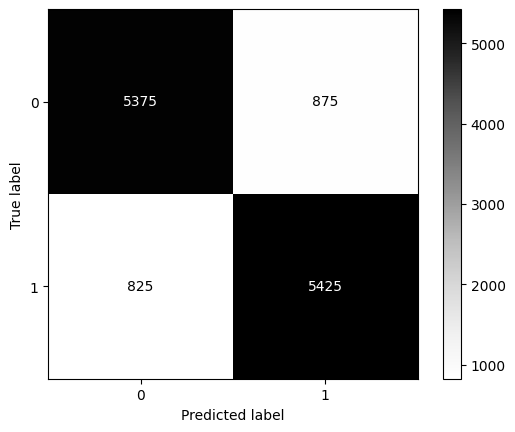

In [157]:
# predict probabilities
y_pred_sequent = model1.predict(test_dataset)
y_pred_sequent = (y_pred_sequent > 0.5)

# classification report
print("="*10,"TEST","="*10)
print(classification_report(y_test, y_pred_sequent, zero_division=0))

# confusion matrix
cm = confusion_matrix(y_test, y_pred_sequent)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot(cmap='Greys')
plt.show()

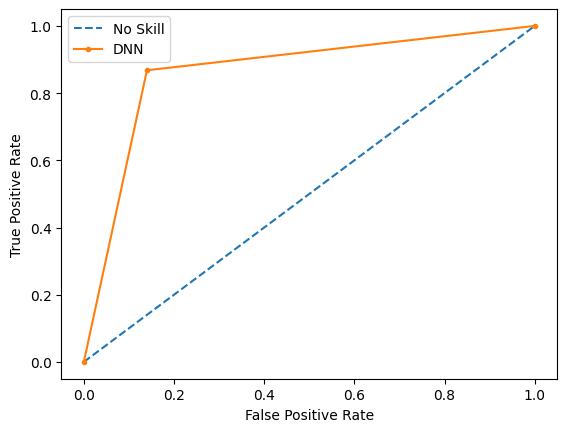

AUC score: 0.864


In [158]:
# calculate roc curves & auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_sequent)
auc = roc_auc_score(y_test, y_pred_sequent)

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='DNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
print(f'AUC score: {auc}')

Model Evaluation:
Dari hasil model evaluation kita fokus ke nilai recall yaitu predict kategori 1, hal tersebut dikarenakan recall 1 merupakan gambaran dari model dalam memprediksi kategori review positif, yang mana kategori tersebut yang dijadikan urgensi dalam penelitian ini. nilai recall 1 pada model ini sebesar 0.87 dan kita lihat dari nilai UC score dimana ditetapkan treshold sebesar 0,5 dan skor model LSTM kali ini adalah 0,864 , dapat diambil kesimpulan bahwasannya model berjalan dengan baik.

### Model Saving

In [160]:
pickle.dump(txt_test, open('cleaner.pkl','wb'))

In [162]:
pickle.dump(Vectorize, open('Vectorize.pkl','wb'))

In [163]:
model1.save('model_movie.tf')

### Model Inference

In [175]:
inf = "I've watched the film twice and it's still impressive"
inf

"I've watched the film twice and it's still impressive"

In [176]:
txt_test(inf)

'watched twice still impress'

In [181]:
inference_pred = model1.predict([[inf]])
inference_pred

1/1 [==============================] - 0s 35ms/step


array([[1.1686251]], dtype=float32)

In [174]:
inference_pred

array([[1.1686251]], dtype=float32)

In [182]:
if inference_pred >= 1:
    print("Positif Review")
else:
    print("Negatif Review")

Positif Review


### Conclusion

- Penengenalan data sangat penting dalam pemodelan ini, hal tersebut dibuktikan oleh performa model sebelum dan sesudah pengurangan kata-kata pada data. proses ini tidak ditampilkan dalam notebook, informasi tersebut didapatkan penulis selama pengerjaan tugas ini. untuk pengenalan data tersebut dapat memanfaatkan wordcloud untuk melihat dominansi kata pada kedua kategori
- dari ketiga model, model LSTM merupakan model terbaik dalam sentimen analisis dengan menggunakan data movie review.
- tuning parameter tidak memberikan improvement pada model LSTM
- untuk selanjutnya dapat dilakukan percobaan tuning pada model gru, yang mana dalam penelitian ini penulis belum mengeksplor lebih banyak tentang model gru (melakukan tuning pada model gru)